In [1]:
# So what questions do I have so far?
# 1. Should I use rho(r) to find r_s (so after long debate with my self I say no because does not help)
# 2. Should I use V(r) to find V_200 and C_200 (better find r_s and C200)
# 3. If 1 and 2 then I get two values for r_s (yeah how different are they?)
# 4. it seems that r_s obtained from rho(r) is more presize 
# 5. Should I find r_200 just from rho_enc (probably not)
# 6. should I find M_200 from mass profile from paper or by using mass_enc (assume paper)

In [2]:
import time
start_time = time.time()
import pynbody as pyn
import scipy, numpy, DM_Profiles
from matplotlib import pylab as plt
from scipy.optimize import curve_fit as fit
s = pyn.load('/media/tengiz/81498267-fb7c-4587-88ea-5c63aaf2cb66/Pynbody/testdata/g15784.lr.01024.gz')
s.physical_units()
h = s.halos()
# rho_crit = pyn.analysis.cosmology.rho_crit(s)*200
# H = float(pyn.analysis.cosmology.H(s))
# tmass = h[1]['mass'].sum()

In [3]:
def halos_CM(halo, to_graph = False):
    # well this is very poorely written | not anymore
    modes = ['hyb', 'ssc', 'com','pot']
    output = ()
    try: 
        with pyn.analysis.angmom.faceon(halo, cen_size  =  '20 kpc'):
            output = halos_exec(halo, to_graph)
#             pyn.plot.image(halo.g, width=100, cmap='Blues')
    except (ValueError, RuntimeError):
        print('faceon has failed, trying backup')
        for i in range(5):
            if i == 4:
                print('all backups have failed')
                output = ('failure')
                break
            try:
                with pyn.analysis.halo.center(halo, mode = modes[i], cen_size = '20 kpc'):
                    output = halos_exec(halo, to_graph)
#                     pyn.plot.image(halo.g, width=1000, cmap='Blues')
                break
            except (ValueError, RuntimeError):
                print(modes[i] + ' backup has failed')

    return output

In [4]:
def halos_exec(halo, to_graph = False):
    #takes in halo and boolean whether to graph 
    # outputs mass and concentration
    
    p = pyn.analysis.profile.Profile(halo, min = 0.01, max = 50, ndim = 3, type = 'lin', nbins = 100)
    radii = p['rbins']
    den = p['density']
    vel = p['v_circ']
    hp = DM_Profiles.DM_Profile(radii, den, vel, s)
    hp.fits_pISO() 
    output = hp.pISO()
    if to_graph:
        den_plot(radii, den, output[2], hp)
        vel_plot(radii, vel, output[3], hp)
        
    return output[0], output[1]

In [5]:
# den plot
def den_plot(radii, den, param, halo_profile):
    # takes radii, den, param and DM_Profile object from DM_Profiles and outputs den profile with p_ISO curve_fit
    import DM_Profiles
    from matplotlib import pylab as plt
    fig, ax = plt.subplots() 
    ax.semilogy(radii, den, 'g--')
    ax.semilogy(radii, halo_profile.rho_pISO(radii, *param), 'r-')
    ax.grid()
    ax.legend(('data','fit'))
    ax.set_title('data den vs r')
    ax.set_xlabel(radii.units)
    ax.set_ylabel(den.units)
    plt.show()
#     halo_profile.chisq_pISO()
#     print(halo_profile.den_chisq)

In [6]:
# vel plot
def vel_plot(r, vel, param1, halo_profile):
    # takes radii, den, param and DM_Profile object from DM_Profiles and outputs vel profile with p_ISO curve_fit
    import DM_Profiles
    from matplotlib import pylab as plt
    fig1, ax1 = plt.subplots()
    ax1.plot(r, vel, 'g--')
    ax1.plot(r, halo_profile.V_pISO(r, *param1), 'r-')
    ax1.grid()
    ax1.legend(('data','fit'))
    ax1.set_title('data vel vs r')
    ax1.set_xlabel(s['pos'].units)
    ax1.set_ylabel(vel.units)
    plt.show()
#     halo_profile.chisq_pISO()
#     print(halo_profile.vel_chisq)

In [7]:
# I leave this code here for debugging coz lazy
# def rho_pISO(r, rho_s,r_s): 
#     # r200 is the radius inside of which the average halo (bg paper)
#     return rho_s/(1+(r/r_s)**2)
# def V_pISO(r, C_200):
# #     if param == []: raise CustomError('rho_pISO has not been fitted yet')
#     H = float(pyn.analysis.cosmology.H(s))
#     return 10*H*param[1]*C_200*((1-numpy.arctan((r/param[1]))/(r/param[1]))/(1-numpy.arctan(C_200)/C_200))**0.5

# pyn.analysis.halo.center(h[1], mode = 'hyb', cen_size = '10 kpc')
# pyn.analysis.angmom.faceon(h[1])
# initial_guess = [10**10, 0.01]
# p = pyn.analysis.profile.Profile(h[1], min = 0.01, max = 50, ndim = 3, type = 'log', nbins = 50)
# radii = p['rbins']
# den = p['density']
# vel = p['v_circ']
# param, covar = fit(rho_pISO, radii, den, p0 = initial_guess, bounds = (0,numpy.inf))
# param1, covar1 = fit(V_pISO, radii, vel, bounds = (0, numpy.inf))


In [8]:
# bad_halos = []
# for i in range(201,len(h)):
#     output = halos_CM(h[i])
#     if output == ('failure'):
#         bad_halos.append(i)
#     print('halo number ' + str(i) + ' is done')
# print(bad_halos)

/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


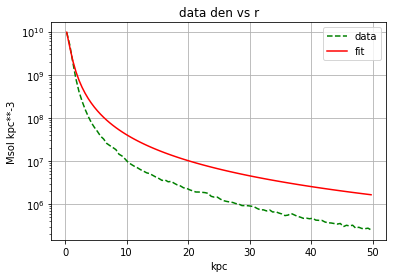

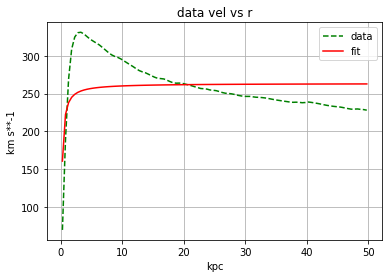

halo number 1 is done


/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


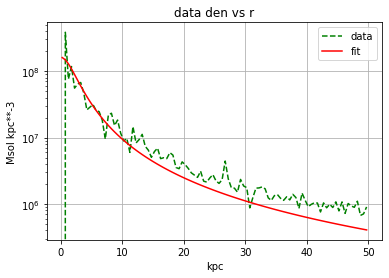

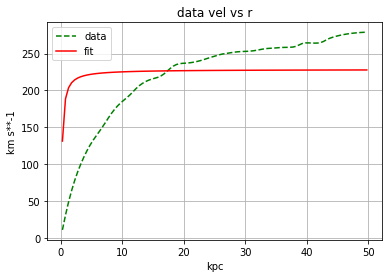

halo number 2 is done


/home/tengiz/.local/lib/python3.6/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


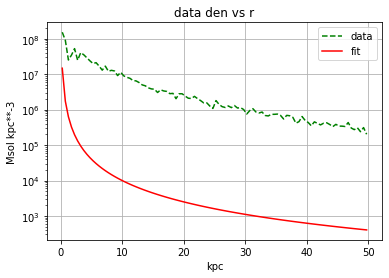

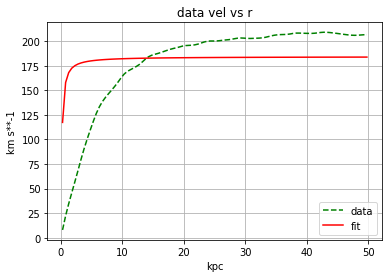

halo number 3 is done
[(16219854115.235514, 1.1294961730662003), (31072.043096122743, 0.0001424042044948572), (0.01857841164939428, 4.032486081497485e-05)]


In [9]:
CM =[]
for i in range(1,4):
    CM.append(halos_CM(h[i], to_graph = True))
    print('halo number ' + str(i) + ' is done')
print(CM)

In [10]:
print(time.time() - start_time) # so it took 15 seconds for 10 halos (can I do better than that?)

14.949357509613037


In [11]:
# so apparently there is a lot of noise close to the center
# also those halos that are out of NIHAO mass range are creating problems

In [12]:
# m_i = []
# for i in range(1,101):
#     mass = (float ( ( h[i]['mass'].sum() ) ) )
# #     print(float(mass))
#     if not ( 5*10**9 < mass and mass < 2*10**12):
#         m_i.append(i)
# #     print(not ( 5*10**9 < mass and mass < 2*10**12))

In [13]:
# [49, 55, 67, 91, 96, 149, 175]
# [203, 205, 214, 218, 219, 223, 238, 244, 281, 288, 292, 308, 317, 326, 327, 332, 337, 352, 355, 378, 382, 391, 401, 404, 407, 430, 439, 440, 442, 443, 448, 452, 455, 463, 469, 486, 496, 508, 514, 518, 519, 523, 527, 528, 534, 537, 544, 546, 547, 549, 555, 560, 561, 572, 575, 576, 580, 582, 583, 586, 588, 591, 603, 605, 608, 610, 612, 615, 617, 618, 623, 628, 631, 633, 637, 643, 646, 652, 653, 655, 658, 663, 668, 669, 672, 674, 675, 676, 681, 682, 685, 690, 691, 698, 699, 700, 704, 705, 706, 707, 708, 711, 719, 726, 727, 730, 734, 735, 737, 739, 740, 741, 744, 745, 747, 748, 752, 754, 758, 760, 761, 774, 777, 778, 782, 784, 786, 787, 790, 791, 796, 798, 801, 802, 803, 807, 809, 811, 814, 816, 817, 819, 820, 821, 824, 825, 827, 828, 829, 830, 831, 833, 835, 838, 839, 843, 845, 848, 850, 856, 857, 858, 859, 860, 861, 863, 865, 867, 868, 869, 871, 873, 875, 883, 884, 885, 887, 889, 891, 892, 893, 896, 899, 900, 902, 903, 904, 905, 906, 908, 909, 911, 912, 916, 917, 918, 920, 923, 924, 927, 928, 929, 932, 934, 936, 937, 941, 949, 952, 953, 955, 958, 961, 963, 964, 969, 972, 973, 976, 978, 979, 980, 983, 985, 986, 991, 993, 994, 998, 999, 1000, 1002, 1004, 1005, 1007, 1009, 1015, 1016, 1020, 1021, 1022, 1023, 1024, 1025, 1027, 1029, 1030, 1031, 1032, 1033, 1034, 1037, 1039, 1042, 1043, 1045, 1047, 1048, 1049, 1054, 1056, 1059, 1061, 1064, 1065, 1067, 1068, 1069, 1072, 1077, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1093, 1095, 1096, 1100, 1101, 1102, 1104, 1106, 1108, 1109, 1110, 1111, 1112, 1113, 1116, 1119, 1120, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1135, 1137, 1138, 1139, 1140, 1141, 1142, 1146, 1147, 1148, 1149, 1151, 1152, 1153, 1154, 1155, 1156, 1159, 1162, 1163, 1164, 1165, 1167, 1168, 1169, 1171, 1172, 1173, 1176, 1177, 1178, 1179, 1181, 1182, 1185, 1186, 1188, 1189, 1190, 1191, 1192, 1193, 1195, 1196, 1197, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1207, 1208, 1209, 1210, 1211, 1212, 1214, 1215, 1217, 1218, 1219, 1221, 1224, 1226, 1229, 1230, 1232, 1233, 1236, 1240, 1241, 1244, 1245, 1247, 1248, 1250, 1252, 1254, 1255, 1259, 1260, 1261, 1262, 1263, 1265, 1268, 1269, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1281, 1282, 1283, 1284, 1286, 1287, 1288, 1290, 1291, 1293, 1294, 1295, 1296, 1297, 1298, 1300, 1301, 1305, 1306, 1307, 1309, 1311, 1312, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1330, 1332, 1336, 1337, 1339, 1340, 1341, 1342, 1343, 1344, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1354, 1355, 1357, 1359, 1360, 1363, 1365, 1366, 1367, 1368, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1378, 1379, 1380, 1382, 1383, 1385, 1387, 1388, 1389, 1391, 1392, 1396, 1397, 1398, 1399, 1400, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1410]

In [14]:
# halo = 1402
# size = [100, 100, 10, 1]
# for i in size:
#     cs = str(i) + ' kpc'
#     print(cs)
#     center = pyn.analysis.halo.center(h[halo], mode = 'ssc', cen_size = cs, retcen = True)
#     print(center)
#     pyn.analysis.halo.center(h[halo], mode = 'ssc', cen_size = cs)

In [15]:
# halos_CM(h[25], to_graph = True)

In [16]:
for i in range(1, len(h) + 1):
    if len(h[i]) < 1000:
        print(i)
        break

53


In [17]:
# j  =  2
# center = 
# pyn.analysis.halo.center(h[j], mode =  'ssc', cen_size = '10 kpc')
# pyn.analysis.angmom.faceon(h[j], cen = center, cen_size)
# pyn.plot.image(h[j].g, width=100, cmap='Blues')